## Configuración de ambiente de trabajo

## Importar librerías

In [42]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

In [43]:
%run "../missing/utils/pandas-missing-extension.ipynb"

## Configurar el aspecto general de las gráficas del proyecto

In [44]:
%matplotlib inline

sns.set_theme(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [45]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
   # None + 1,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [46]:
print(
    np.nan or True,
    np.nan or False,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    np.nan * 7,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


### Pandas

In [47]:
test_missing_df=pd.DataFrame.from_dict(
    data=dict(
        x=[0,1,np.nan,np.nan,None],
        y=[0,1,pd.NA,pd.NA,None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,<NA>
4,NaN,None


In [48]:
test_missing_df.isna()
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [49]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [50]:
pd.Series([1,np.nan])

0    1.0
1    NaN
dtype: float64

In [51]:
pd.Series([pd.to_datetime("2022-01-01"),np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [52]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [53]:
pima_indians_diabetes_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
### Guardamos la url en una variable. 

In [54]:
## Comando para descargar datos o archivos. y luego donde se guardara. y el link de donde se descargara. -q para que no muestre el mensaje de descarga
!wget -O ../data/raw/pima-indians-diabetes.csv $pima_indians_diabetes_url

--2024-02-28 21:52:29--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘../data/raw/pima-indians-diabetes.csv’

../data/raw/pima-in 100%[===================>]  22.73K  --.-KB/s    in 0.007s  

2024-02-28 21:52:30 (3.38 MB/s) - ‘../data/raw/pima-indians-diabetes.csv’ saved [23278/23278]



In [55]:
## En caso no reconozca el comando wget! libreria urllib.request hace lo mismo
import urllib.request
url = pima_indians_diabetes_url
filename = "./data/diabetes.csv"
urllib.request.urlretrieve(url, filename)

FileNotFoundError: [Errno 2] No such file or directory: './data/diabetes.csv'

In [ ]:
## Leemos el archivo, sep es el separador por comas, names es el nombre de las columnas

diabetes_df=pd.read_csv(
    filepath_or_buffer="../data/raw/pima-indians-diabetes.csv",
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome"
    ],
)
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### naniar (oceanbuoys, pedestrian, riskfactors)

Descargar mas datos de otro paqueta que complementa el anterior

#### Crear unidades de información de los conjuntos de datos

In [ ]:
#Crear unidades de informacion de conjunto de datos de una url base nombre de archivo y extension

base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [ ]:
## Interar sobre cada uno de estos datasets 

datasets_dfs={}

for dataset_name in datasets_names:
    dataset_file=f"{ dataset_name }{ extension }" ## crear nombre de archivo
    dataset_output_file=f"../data/raw/{ dataset_file }" ## donde lo queremos guardar
    dataset_url=f"{ base_url }{ dataset_file }" ## consutrccion de la url
    
    !wget -q -O { dataset_output_file } { dataset_url } ## descarga de archivo y guardado en la carpeta data

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name) ## utlizamos pyreadr para leer el archivo .rda de R y lo guardamos en un diccionario

datasets_dfs.keys()

/home/sathony/miniforge3/envs/missing/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/sathony/miniforge3/envs/missing/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/sathony/miniforge3/envs/missing/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs f

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Incluir conjuntos de datos en nuestro ambiente local

In [ ]:
locals().update(**datasets_dfs) ## acceder a estos archivos sin necesidad de llamar al diccionario, actualiza el entorno local con las variables del diccionario

### Verificar carga

In [ ]:
# como resultado ya estan disponibles en nuestro ambiente global
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape

((736, 8), (37700, 9), (245, 34))

In [ ]:
riskfactors_df.info() ## imprimir su informacion para ver valores faltantes o no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

In [ ]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [ ]:
riskfactors_df.size #8330 para saber la cantidad de valores

riskfactors_df.shape #(245,34) para saber la forma del dataframe

riskfactors_df.missing.number_complete() # 7144

riskfactors_df.missing.number_missing() #1186

riskfactors_df.missing.missing_variable_summary() ## tabla de variables faltantes

riskfactors_df.missing.missing_variable_table()

riskfactors_df.missing.missing_case_summary()

riskfactors_df.missing.missing_case_table()

(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

/home/sathony/miniforge3/envs/missing/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


AttributeError: 'DataFrame' object has no attribute 'n_variables'

#### Número total de valores completos (sin observaciones faltantes)

In [ ]:
riskfactors_df.missing.number_complete() # pra saber cuantos valores completos hay, pero teniamos  unos 8k, faltan 1k

7144

#### Número total de valores faltantes

In [ ]:
riskfactors_df.missing.number_missing() # para saber cuantos valores faltantes hay

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [ ]:
riskfactors_df.missing.missing_variable_summary() # para saber que variables tienen valores faltantes

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


###### Tabulación del resumen por variable

In [ ]:
riskfactors_df.missing.missing_variable_table() # para saber cuantos valores faltantes hay por variable analisis por columna

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [ ]:
riskfactors_df.missing.missing_case_summary() # para saber cuantos valores faltantes hay por fila

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [ ]:
riskfactors_df.missing.missing_case_table() # para saber cuantos valores faltantes hay por fila

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


###### Tabulación del resumen por caso

### Intervalos de valores faltantes

In [ ]:
# para saber valores faltates por bloque de fila x cada 50 filas
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [ ]:
# para saber la racha de valores faltantes
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

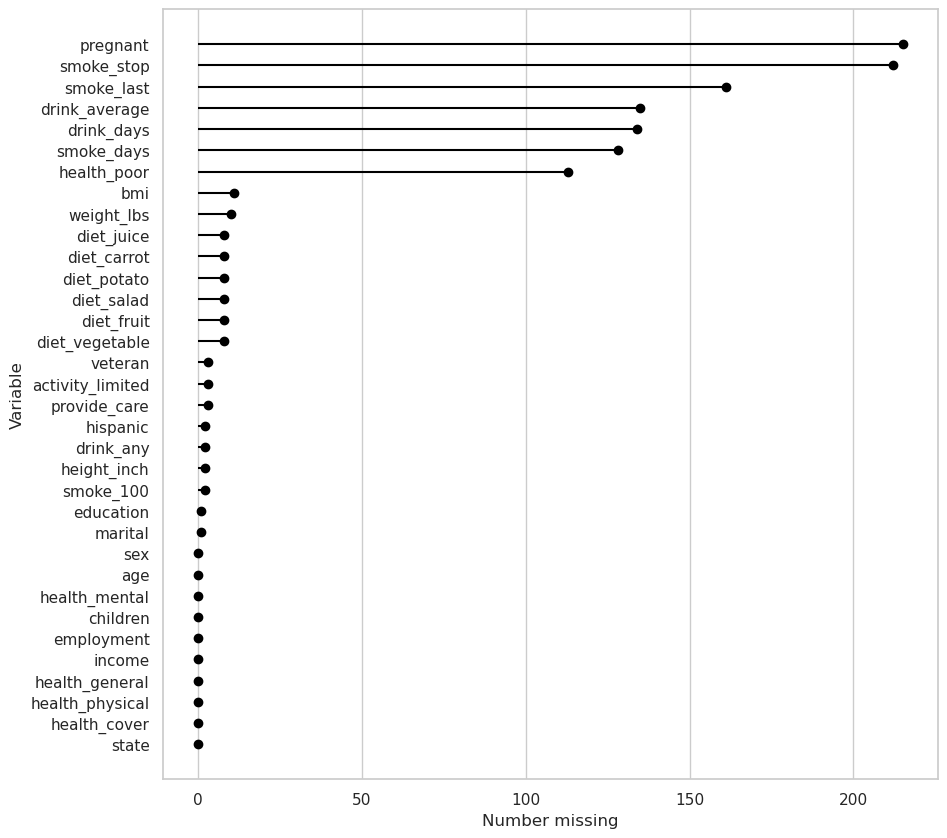

In [ ]:
riskfactors_df.missing.missing_variable_plot() # grafico de puntitos para saber valores faltantes

### Casos / Observaciones / Filas

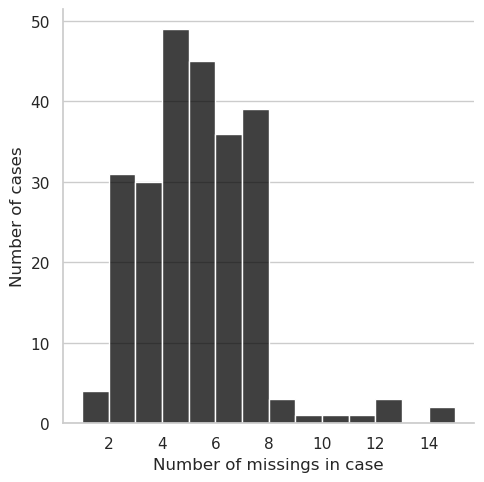

In [ ]:
riskfactors_df.missing.missing_case_plot() # grafico de barras de valores faltantes por fila

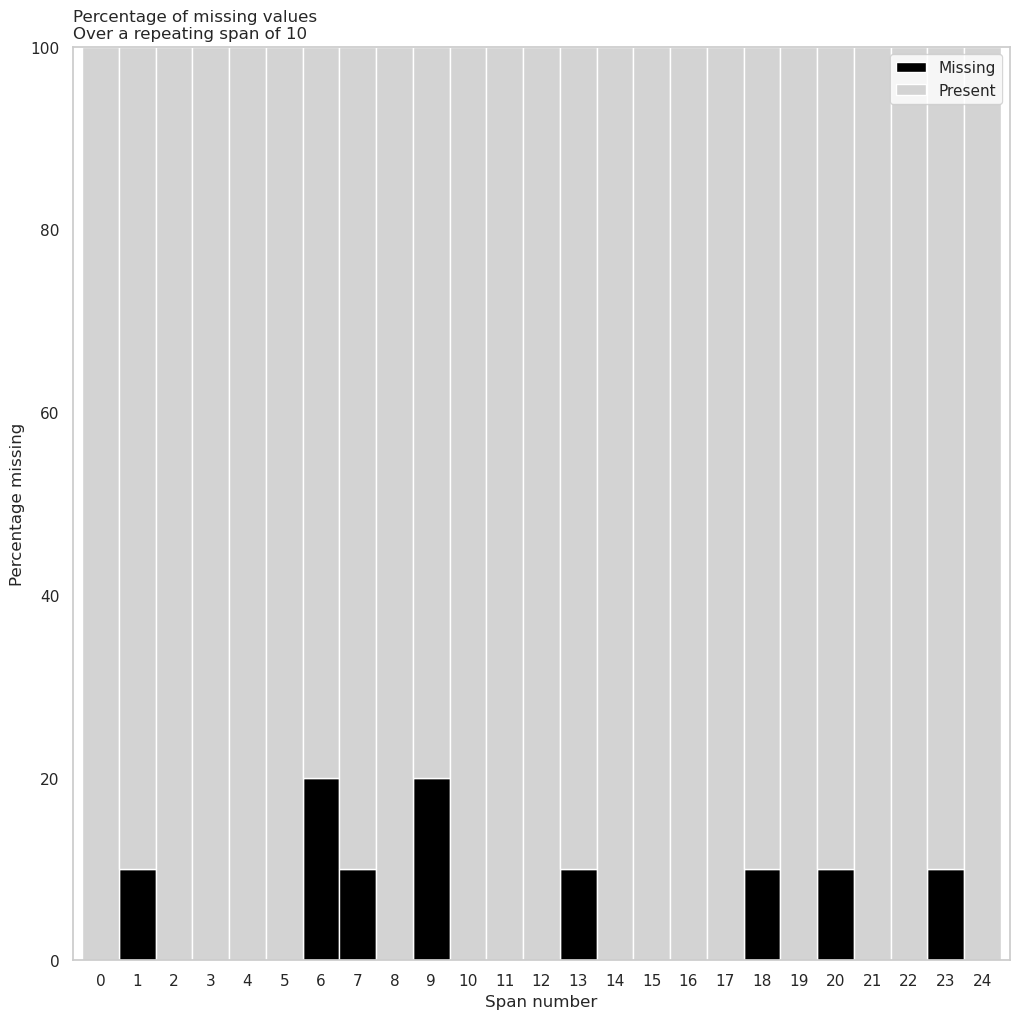

In [ ]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot=0
    )
)
# grafico de bloques de filas para valores faltantes

<Axes: >

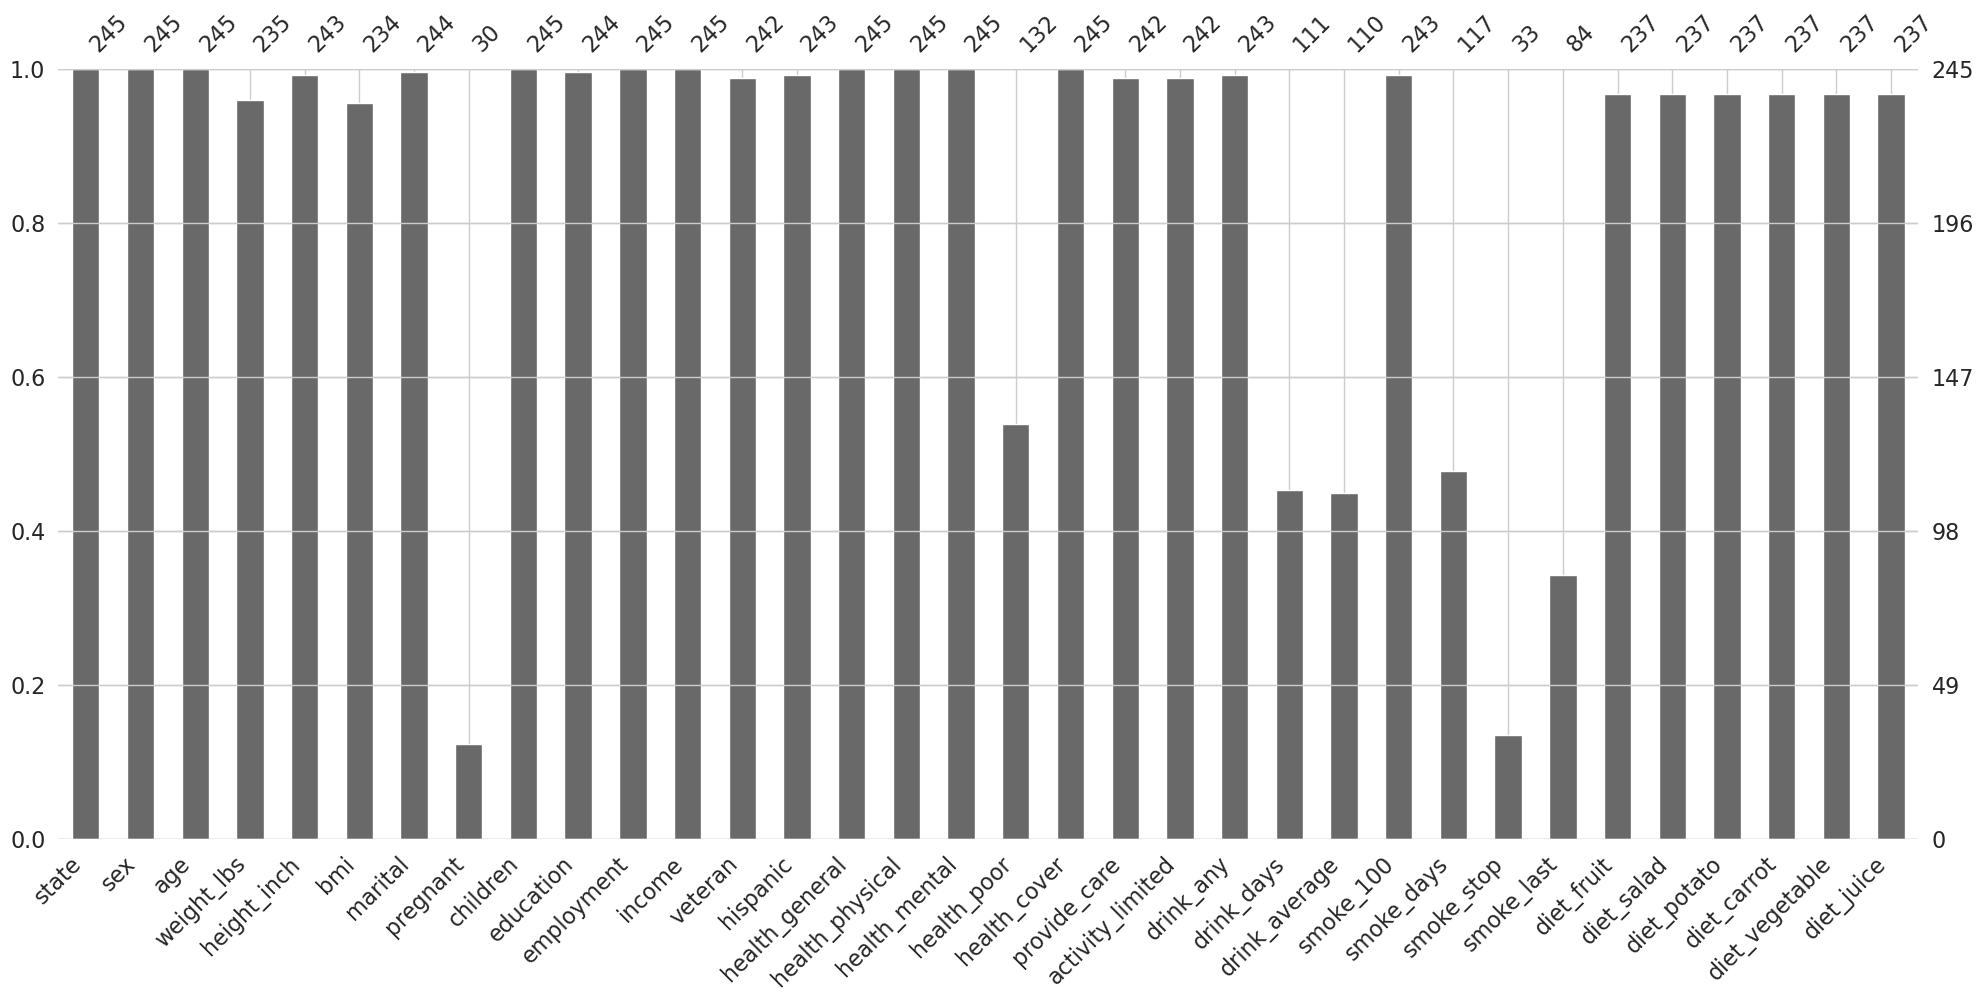

In [ ]:
missingno.bar(df=riskfactors_df) # librerar para missing datos

In [ ]:
riskfactors_df
#missingno.matrix(df=riskfactors_df)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

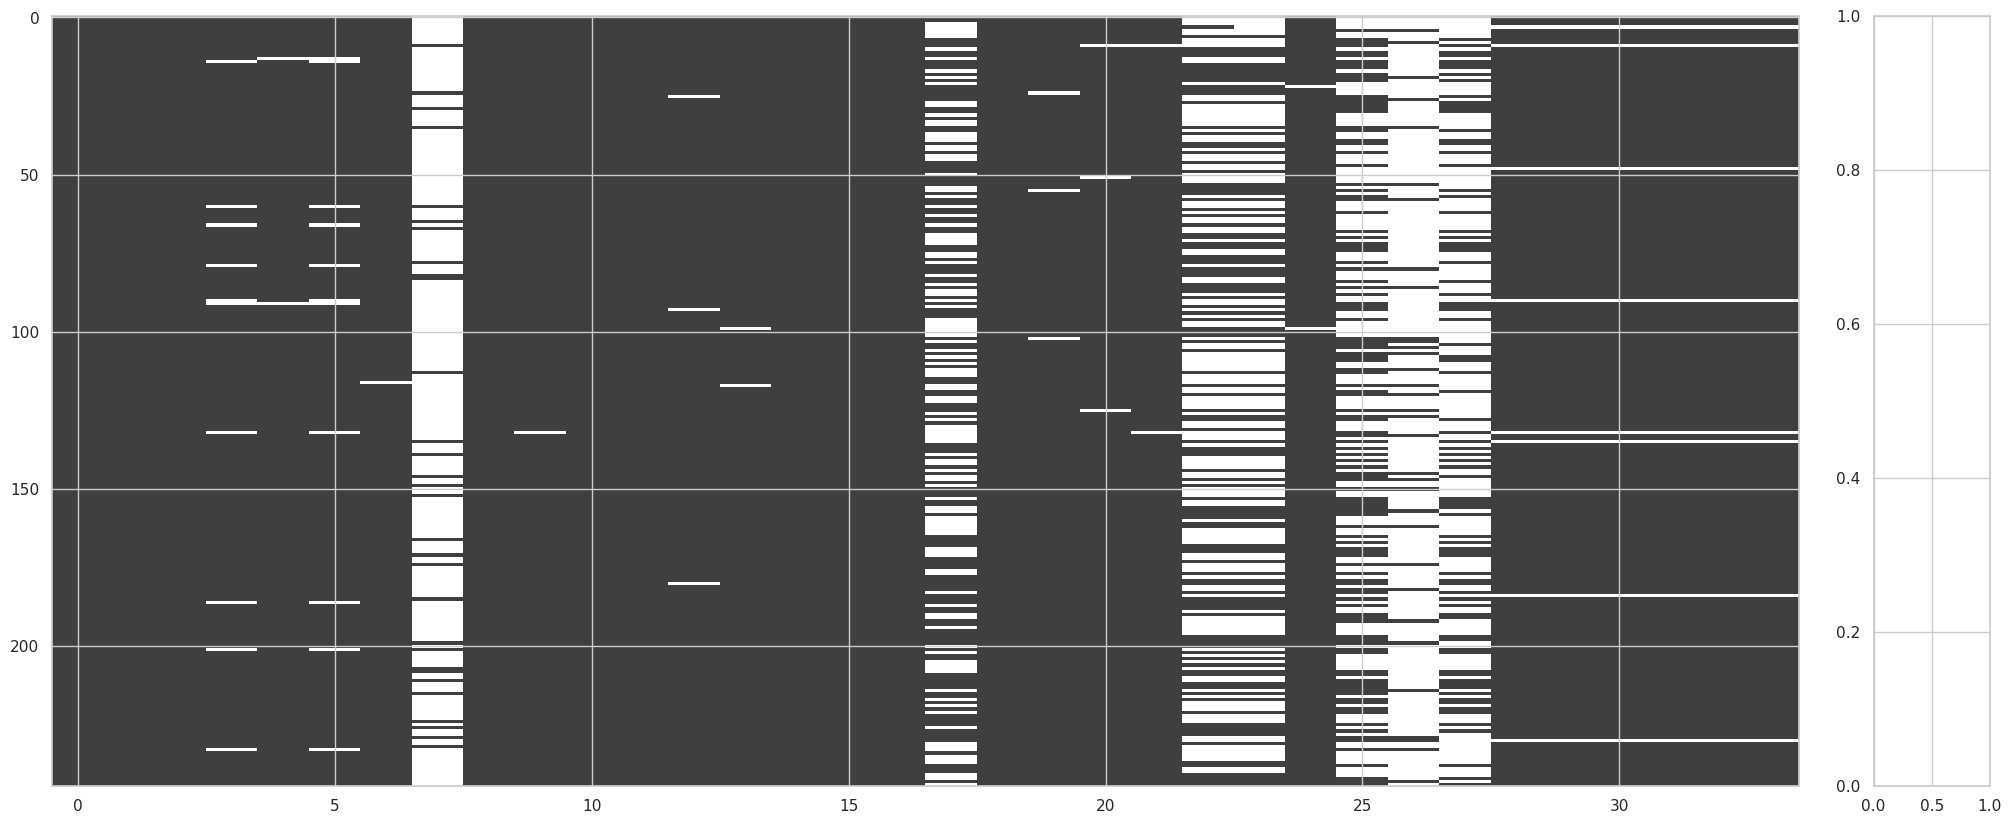

In [ ]:
missingno.matrix(df=riskfactors_df) # grafico de matriz de valores faltantes picos donde hay valores faltantes, para analizar relaciones entre valores faltantes

/home/sathony/anaconda3/envs/missing-data/lib/python3.12/site-packages/upsetplot/plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/sathony/anaconda3/envs/missing-data/lib/python3.12/site-packages/upsetplot/plotting.py:661: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

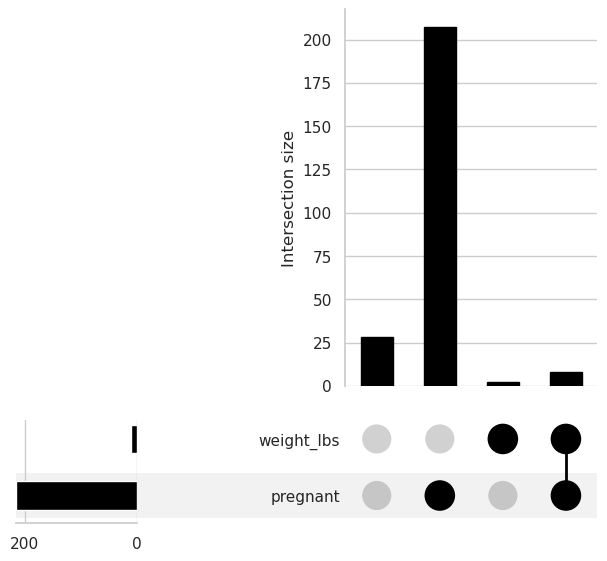

In [ ]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        #variables=None,
        variables=["pregnant","weight_lbs"],
        element_size=60
    )
)

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [ ]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [ ]:
common_na_numbers=(-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [ ]:
missing_data_example_df=pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)
missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [ ]:
missing_data_example_df.missing.number_missing() # para saber cuantos valores faltantes hay, nos dicen que hay 0

0

#### Revisar tipos de datos

In [ ]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [ ]:
missing_data_example_df.x.unique() # para saber los valores unicos de la columna x

array([1, 3, 'NA', -99, -98], dtype=object)

In [ ]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)
# para saber los valores unicos de las columnas de tipo objeto

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [ ]:
pd.read_csv(
    "./data/missing_data_enconding_example.csv",
    na_filter=True, # filtra nuestro na
    na_values=[-99,-1] # pasamos los valores que queremos indentificar como nulos
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99,"NA"], # replazar valores faltantes, para verdaderso valores faltantes de acuerdo a su formato
        value=np.nan
    )
)

/tmp/ipykernel_9217/3501753706.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x":{
                -99:np.nan
            }
        }
    )
)# solo aplicalmos ciertas reglas de sustitucion para una columna en especifico

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [ ]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [ ]:
(
    implicit_to_explicit_df
    .pivot_wider( # tabla largar
        index="name", # preservar lynn y zelda como columna como variable.
        names_from="time",
        values_from="value"
    )
)# pivotar la tabla de datos, entre dos columnas relacionas y que el valor que se descubrir 
#esta entre ellas

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [ ]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"] # columna a cuantificar
    )
    .reset_index(name="n") # hacer una tabla,# de apareciones de cada valor
    .query("n < 2") # filtrar valores que solo aparezcan una vez
)#  cuantificar la ocurrencia de n-tuplas , significa la co-ocurrencia de distintos valores, por ejemplo cuantas vecels aparece lynn y zelda

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [ ]:
(
    implicit_to_explicit_df
    #janitor
    .complete( #janitor, y se complete el nombre de las variables que quiereas completar
        "name",
        "time",
    )
) # para exponer filas de valores faltantes de implicito a explicito, encontrar los pares faltantes de nuestras vairables

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [ ]:
(
    implicit_to_explicit_df
    .complete( # crear un diccionario, donde la llave es una de tus variables y despues los valores que quieres que participen en el producto vectorial
        {"name": ["lynn", "zelda"]},
        {"time": ["morning", "afternoon"]}, # creamos otro diccionario para nuestra varialbe tiempo, y luego los alores que queremos exponer
        sort=True 
    )
)#limitar la exposicion de valores faltantes de tus columnas, no quieres que todo vuelva a existir , cada posible par de combinacion no va a ser necesario siempre.

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0


#### Rellenar los valores faltantes

In [ ]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value=np.nan # puedes incluir con 0, .-1 , o la forma que te gusta representar tus valores faltantes.
    )
)# escoger con que valor quieres rellenar tus valores faltantes, en este caso con np.nan

/home/sathony/anaconda3/envs/missing-data/lib/python3.12/site-packages/janitor/functions/complete.py:244: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implícitos

In [ ]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value=0,
        explicit=False # es decir si ya habia una valor falante explicito dejarlo ya como estaba
    )
)# limitar el rellenado de valores faltantes, por ejemplo si quieres hacer una diferencia entre los valores faltantes que ya existian en tu valor o tu conjunto de datos y los valores faltantes que estas exponiendo

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,0.0
4,zelda,morning,320.0
5,zelda,night,0.0


## Tipos de valores faltantes

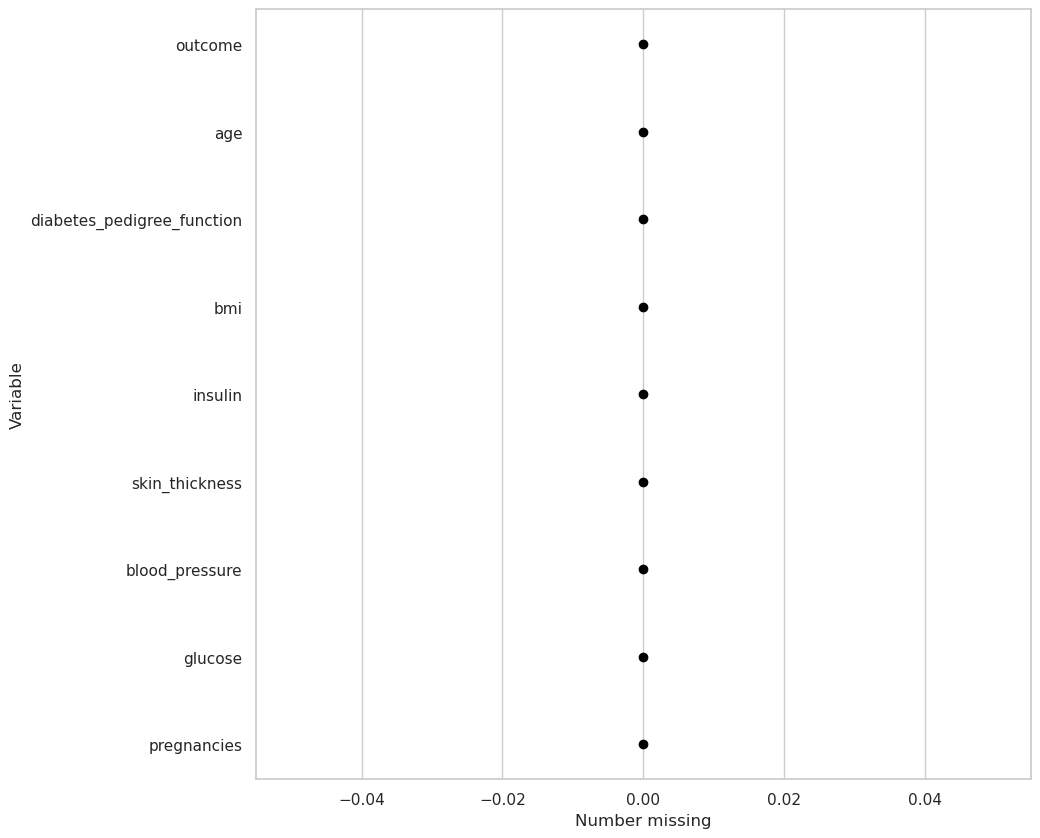

In [ ]:
diabetes_df.missing.missing_variable_plot()

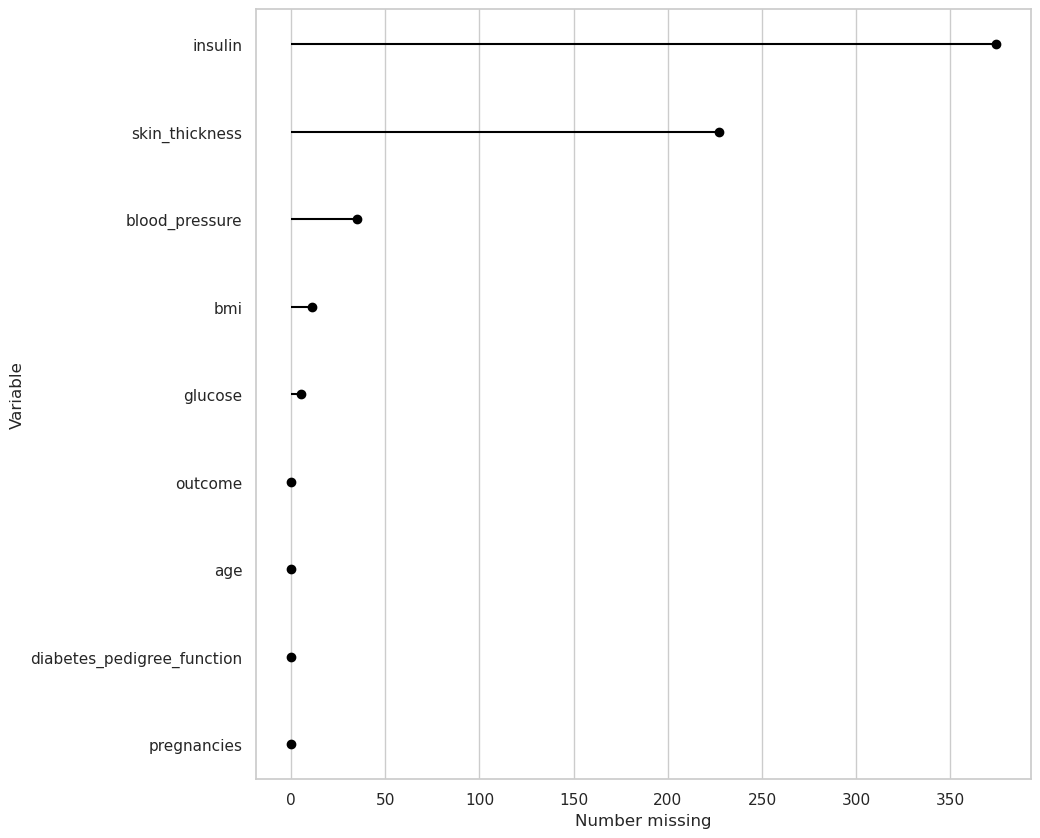

In [ ]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)#seleccionar las columnas con los valores faltantes, de la columna 1-6, lo cual remplazaremos los 0 por valores faltantes , y finalmente se reasigna a nuestro conjunto de datos original-.
diabetes_df.missing.missing_variable_plot() #graficar.

### _Missing Completely At Random_ (MCAR)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

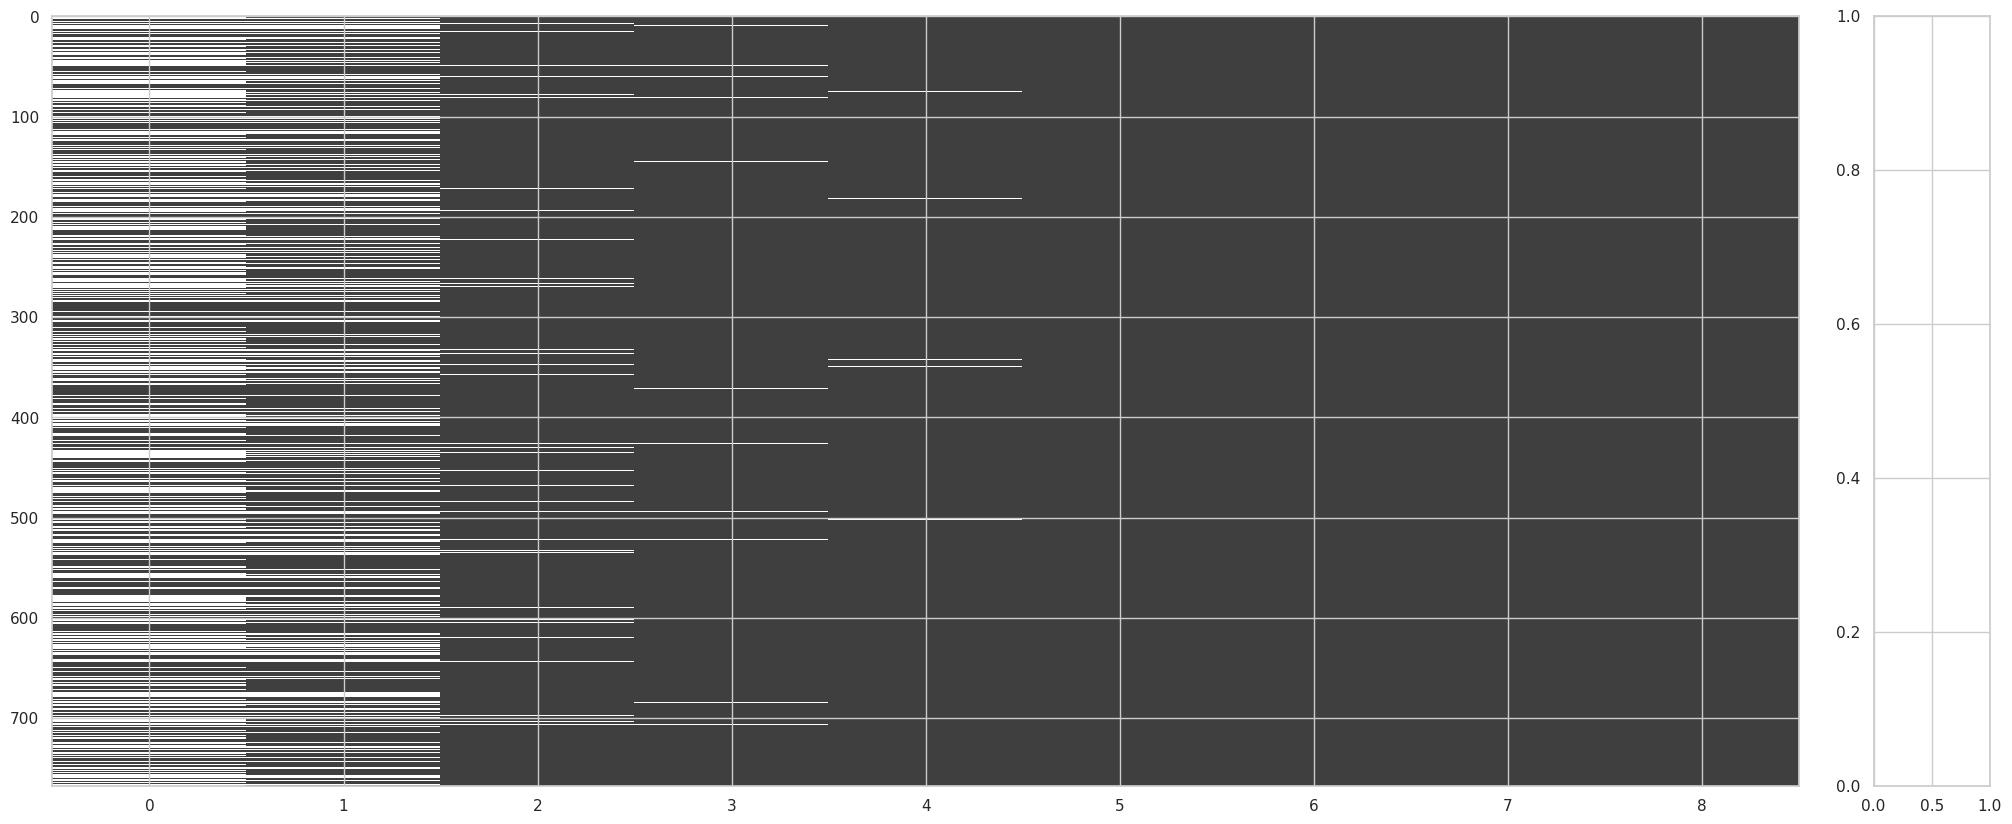

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness() # ordenar las columnas de acuerdoa los vaorlres faltantes.
    .pipe(missingno.matrix)
)

### _Missing At Random_ (MAR)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

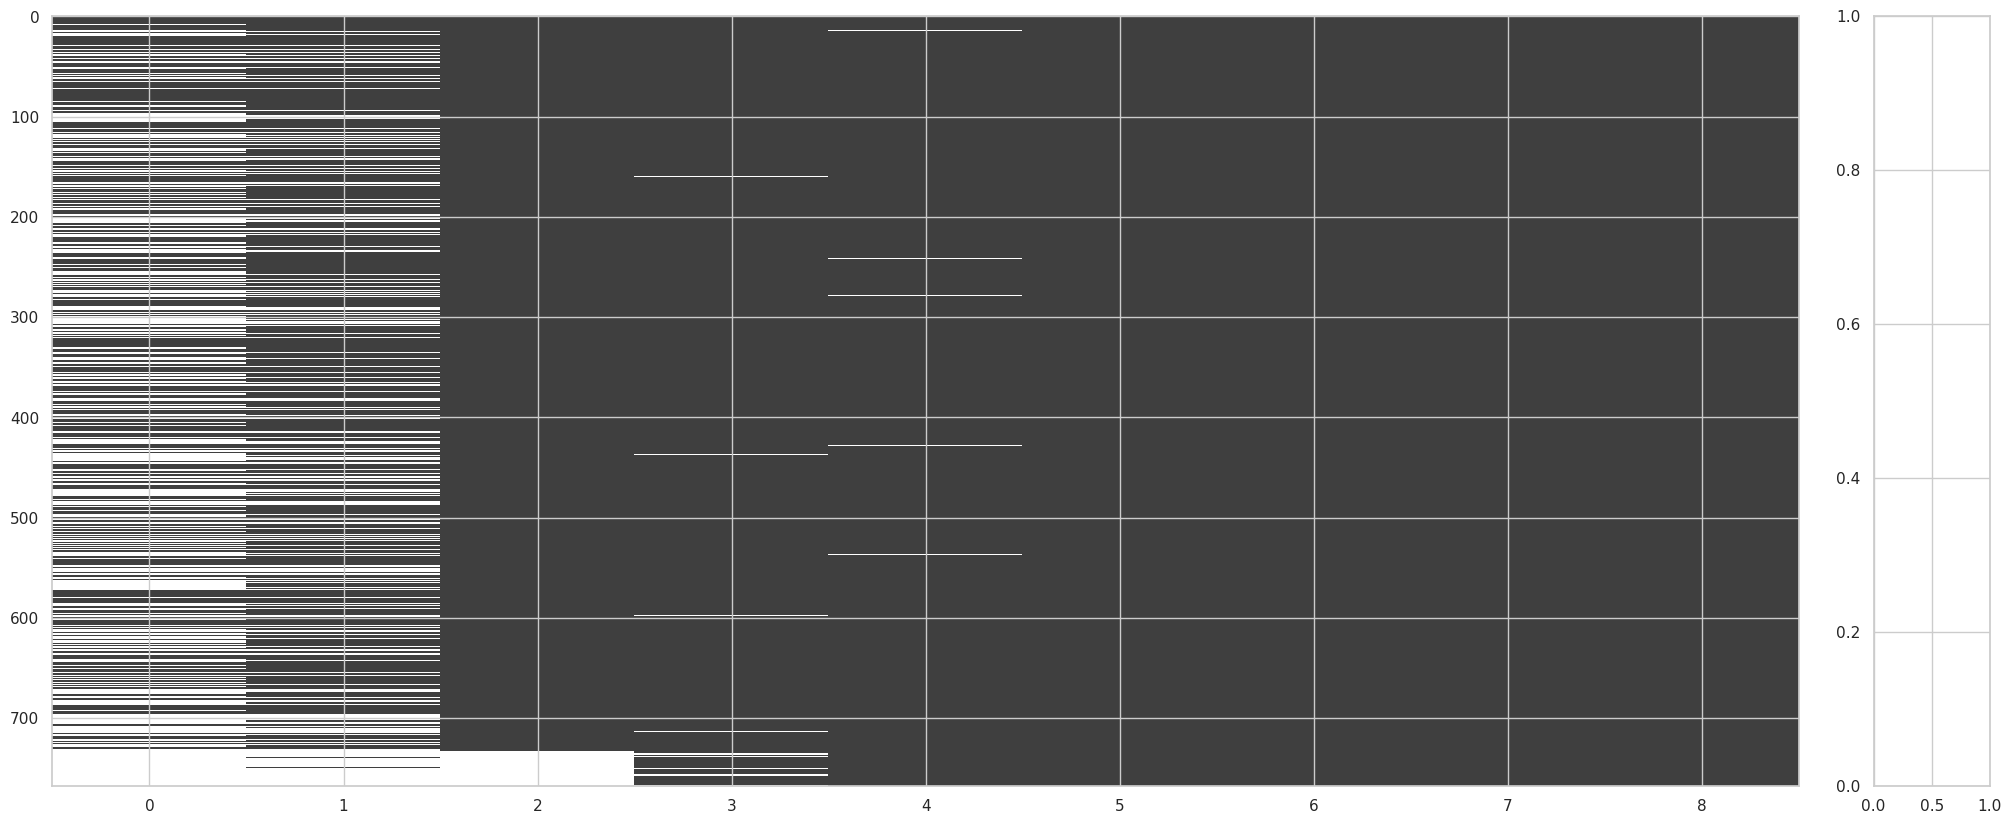

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="blood_pressure")# ordenar por los valores de alguna columna en especifico.
    .pipe(missingno.matrix)
)

### _Missing Not At Random_ (MNAR)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

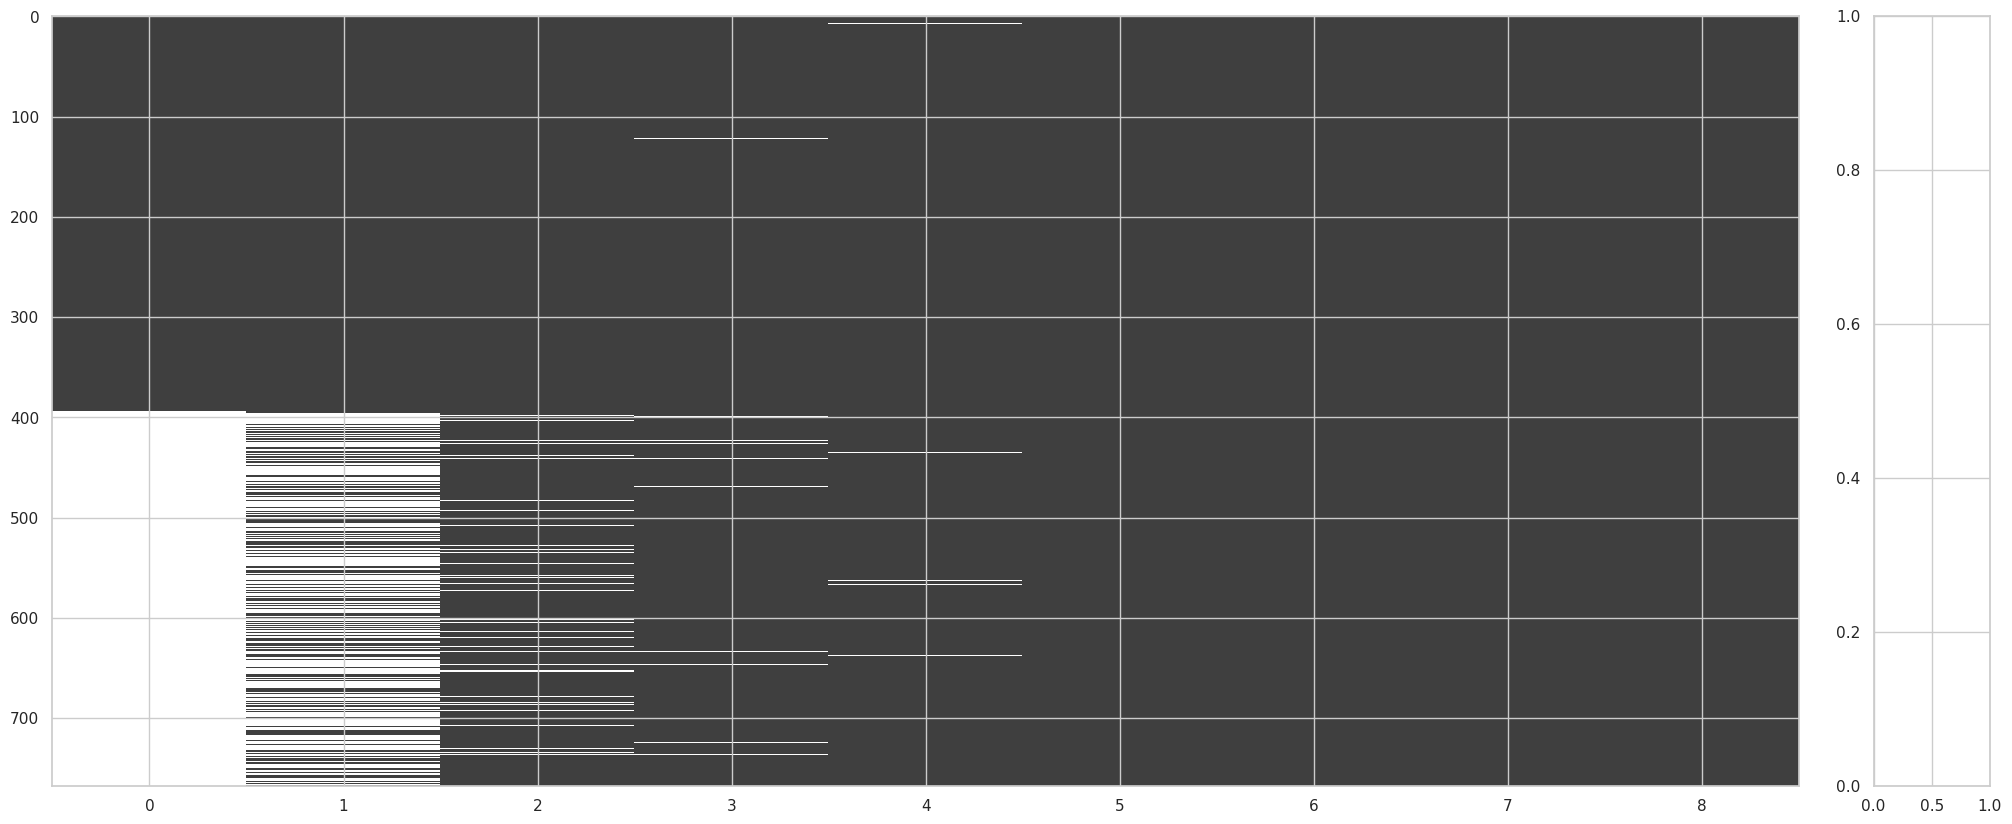

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values("insulin")
    .pipe(missingno.matrix)
) # tenemos valores que estamos observando que al ordenar nunca aparece la insulina.

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [ ]:
(
    riskfactors_df
    .isna() # definir matriz de booleanos
    .replace({ # remplazar 
        False:"Not missing",
        True:"Missing"
    })
    .add_suffix("_NA") # una de las propiedades de la matrix de sombras es tener nombres cordinados entre las variables orginales.
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )# escoger una funiona anonima y concatenar 
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [ ]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True) # lo mismo pero usando una funcion con only_missing, para anexar solo columna falantes
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [ ]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(["weight_lbs_NA"]) # agrupar por la ausencia de un valores faltantes
    ["age"] # seleccionar una columna o una variable
    .describe() #describir los estadisticos de la variable seleccionada
    .reset_index() # reiniciar el indice

)# explorar estadisticos en estas nuevas columna para explorar si existen una diferencia de alguna variable referente a la ausencia de otra

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

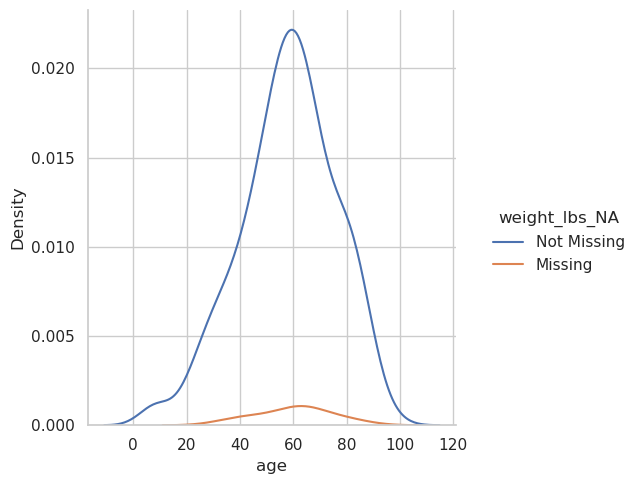

In [ ]:
(# teniendo la ausencia o presencia de otra variable
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA", # distribuciones de dencidad
                kind="kde",
                
            )
        )
    )
)

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

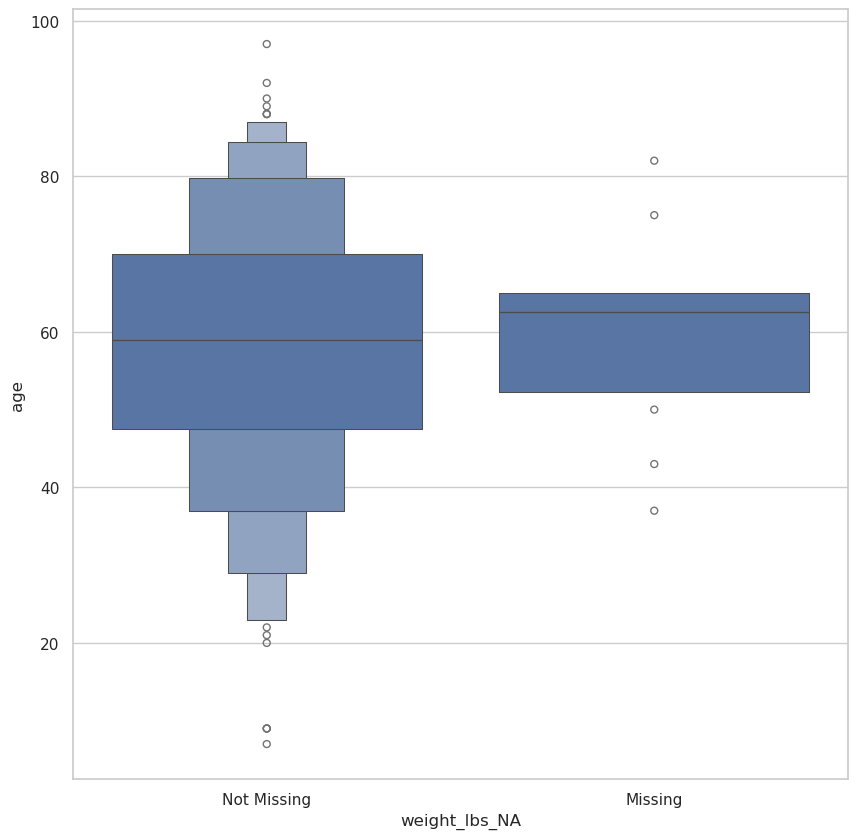

In [ ]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",# variable que queremos comparar
                y="age", # variable que queremos com
            )
        )
    )
)

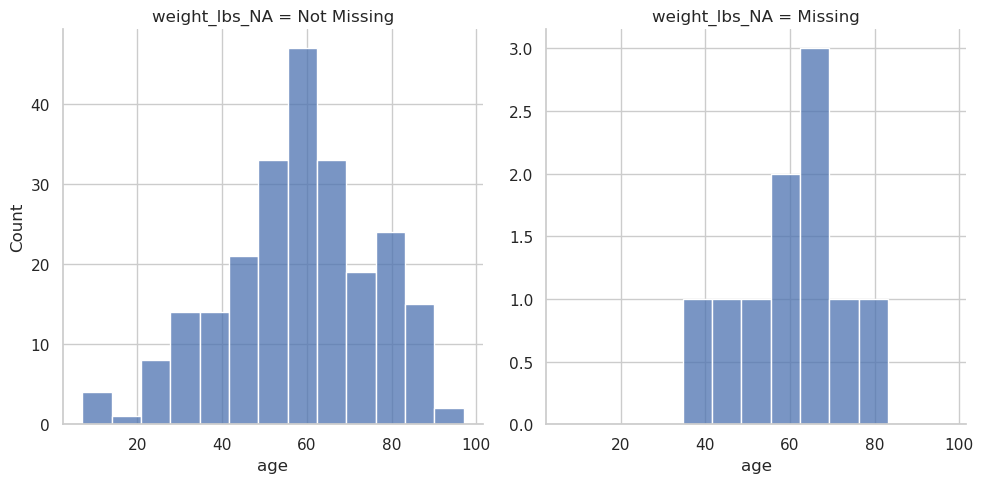

In [ ]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False # cada grafica tiene un axes diferente para el eke de las y
                }
            )
        )
    )
)

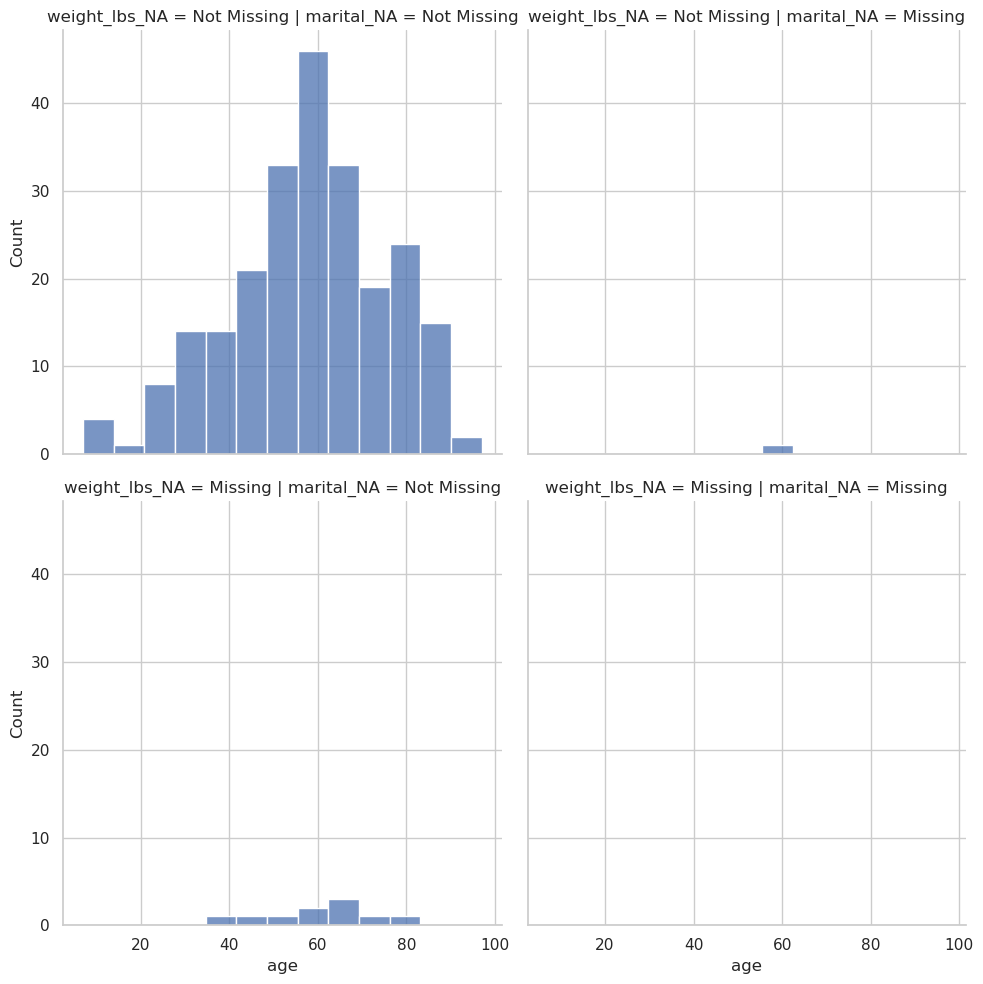

In [ ]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="age",
                col="marital_NA", # matrimonio
                row="weight_lbs_NA", # peso ausencia o no
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

In [ ]:
def column_fill_with_dummies( # añadir funciones random para analizarlos en un eje
        column: pd.Series, # añadir un parametro, columna str o depende
        proportion_below: float = 0.10, #un porcentaje en el cual podemos graficar los datos, azules y laterals faltantes. para no meszclaro con los datos reales, graficar en un proporcion mas baja
        jitter: float = 0.075, # puntos que se movian parece algo random(ayuda a visualizar datos en caso haya azolapamiento en ciertas mediciiones)
        seed: int=42 # añadir una semilla por que introducimos un componente aleatorio
) -> pd.Series: # lo que retorna es una serie de pandas
    
    column = column.copy(deep=True) # copiar la columna para no modificar la original

    # Extract values metadata 
    missing_mask = column.isna() # mascara de valores faltantes
    number_missing_values=missing_mask.sum() # contar valores faltantes
    column_range=column.max()-column.min() # rango de valores

    # shift data
    column_shift = column.min() - column.min() * proportion_below # mover los datos hacia la izquierda, para que no se mezclen con los datos reales

    # create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter # columna con los valores ya movidos de lugar, genramos numeros aleatorio(le pasamos la cantidad de cuantos numeros alesatorio queremos y le restamos un numero(2 de referencia)) despues multiplicamos el rango de nuestros datos y multiplicamos la canitda de ruido que queremos

    # save new dummy data.
    column[missing_mask]=column_shift + column_jitter # rangos que estan en la proporicion y sumarle el ruido

    return column

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

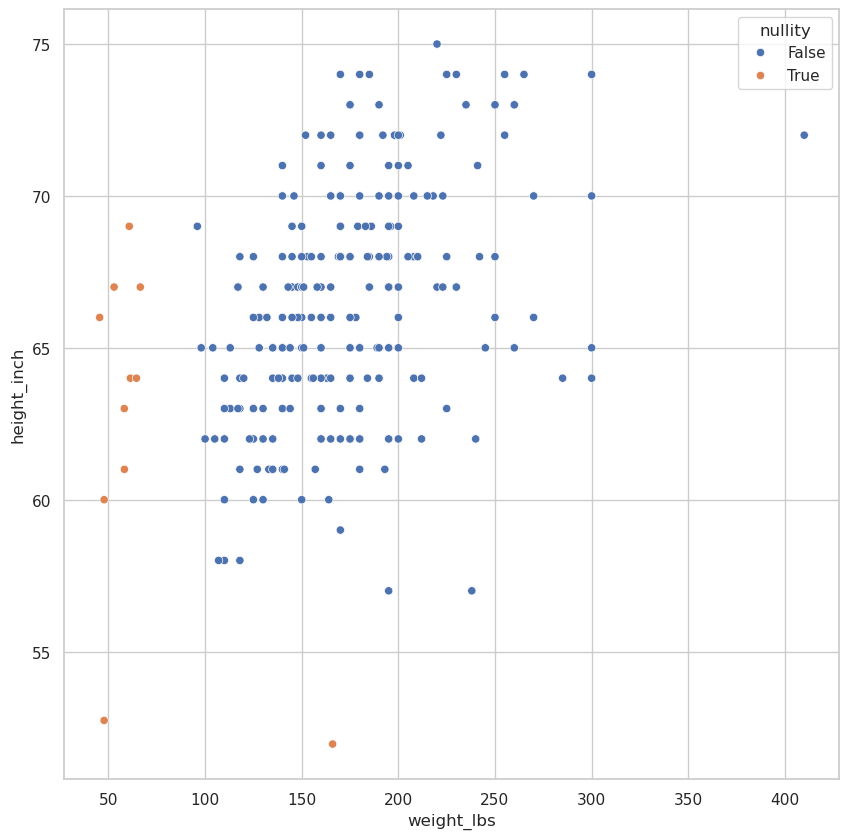

In [ ]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df # scatterplot solo variables numericas.
    .select_dtypes( # seleccionar la columna que queremos
        exclude="category" # excluimos la columna de categoria o de tipo objeto
    )# obtenos full numerico.
    .pipe( # el objetivo es quedarnos con columna de valores faltantes. 
        lambda df: df[df.columns[df.isna().any()]] # seleccionar cualquier columnas que tienen valores faltantes
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False) # matrix de sombra, agregamos valores buleanos con true string y false string
    .apply( # aplicar una funcion a cada columna de tipo numerico
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075) # en caso la columna tenga un sufijo _NA, regresamos el nombre. si no, aplicamos la funcion de column_fill_with_dummies , % y jitter el ruido. 
    )
    .assign( # creamos una nueva columna 
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA # utilizamos dos variables para graficar. 
    )
    .pipe( # graficar nuestro scatter
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity" # pintar nuestros datos de la columna 
            )
        )
    )
)

## Correlación de nulidad

<Axes: >

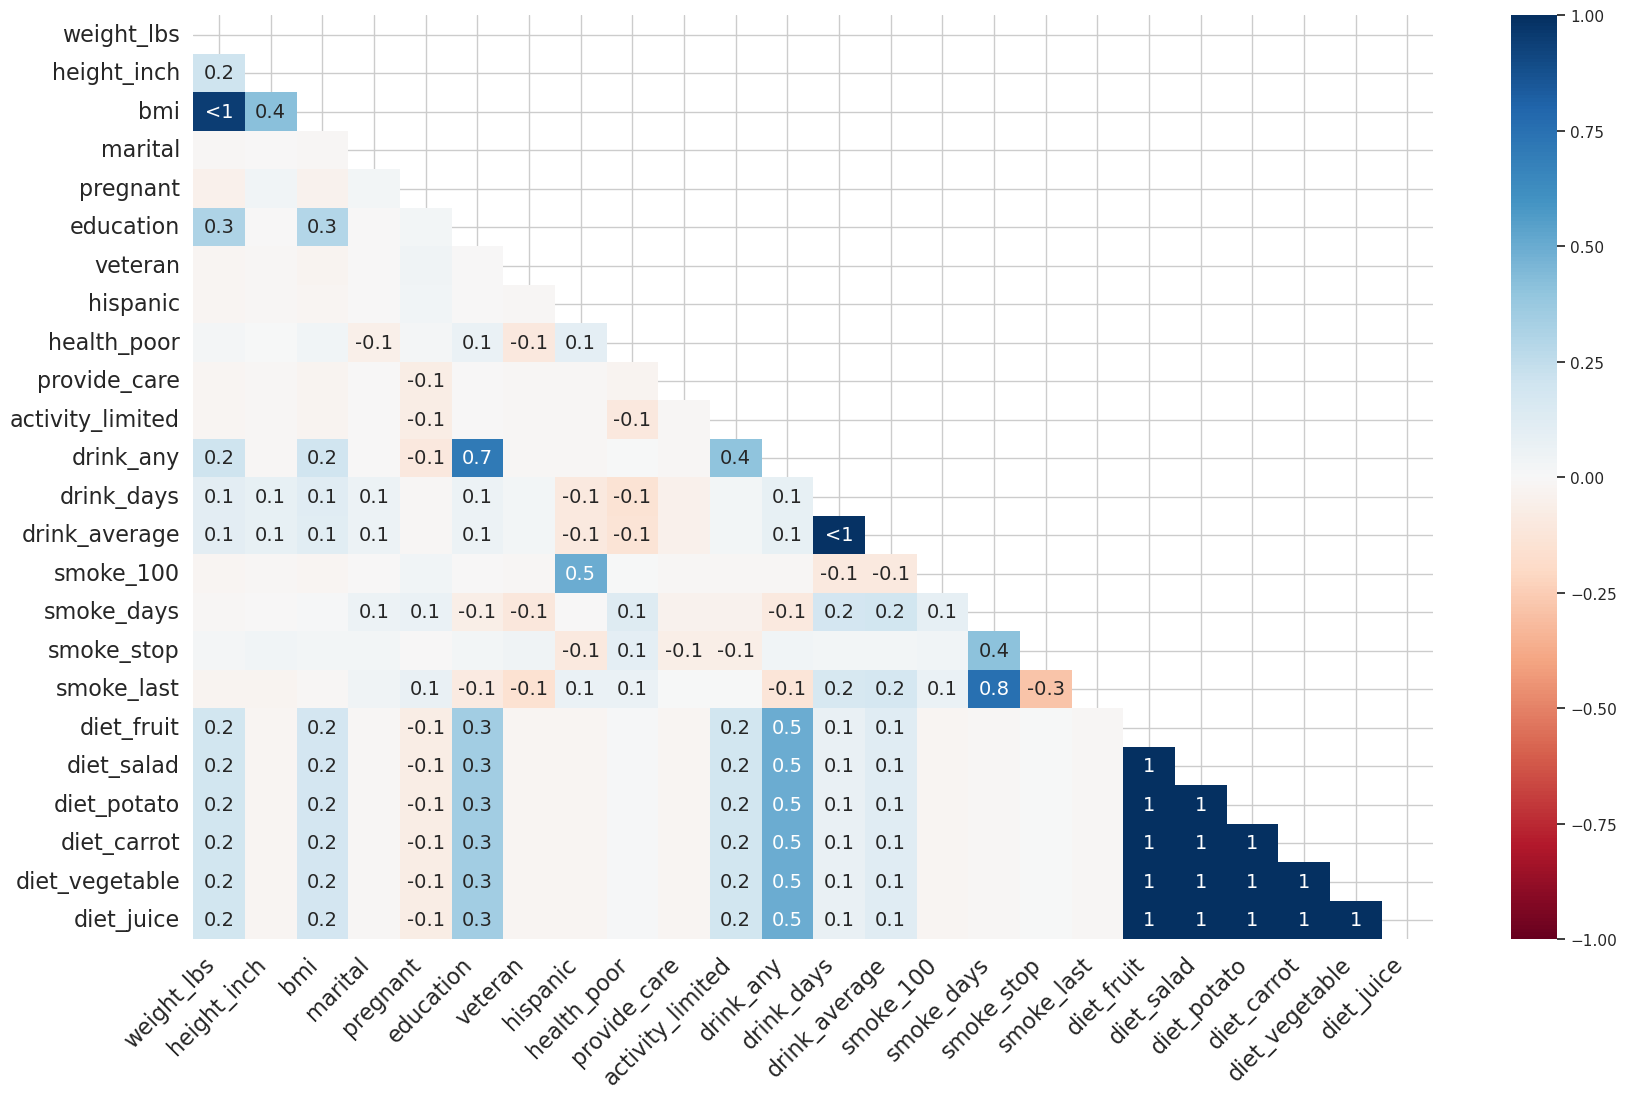

In [ ]:
missingno.heatmap(
    df=riskfactors_df,
)# colores azules son aquellos que tienen una correlacion positiva. Indican que existen una correlacion de los valores faltantes de una columna con otra columna. ejmplo. dieta, todos tienen valores de 1 , cada vez que nos falta un valor en la dieta de fruta nos falta uno en enzalada para los otros tipos de dieta. 

# valores rojos, son negativos. Nos dice que para una variable cuando tengas un valor, para la otra no lo vas a tener. o viceversa, 

# valor cercano a 0, nos indica que probablemente no existe una relacion entre la presencia de nuestros valores faltantes comprado con la otra columna

# si te encuentras con un simbolo de < color rojo o aazul y eso indica que estamos cerca del 100% de correlacion positiva. Y si es rojo cerca del 100% de correlacion negativa.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

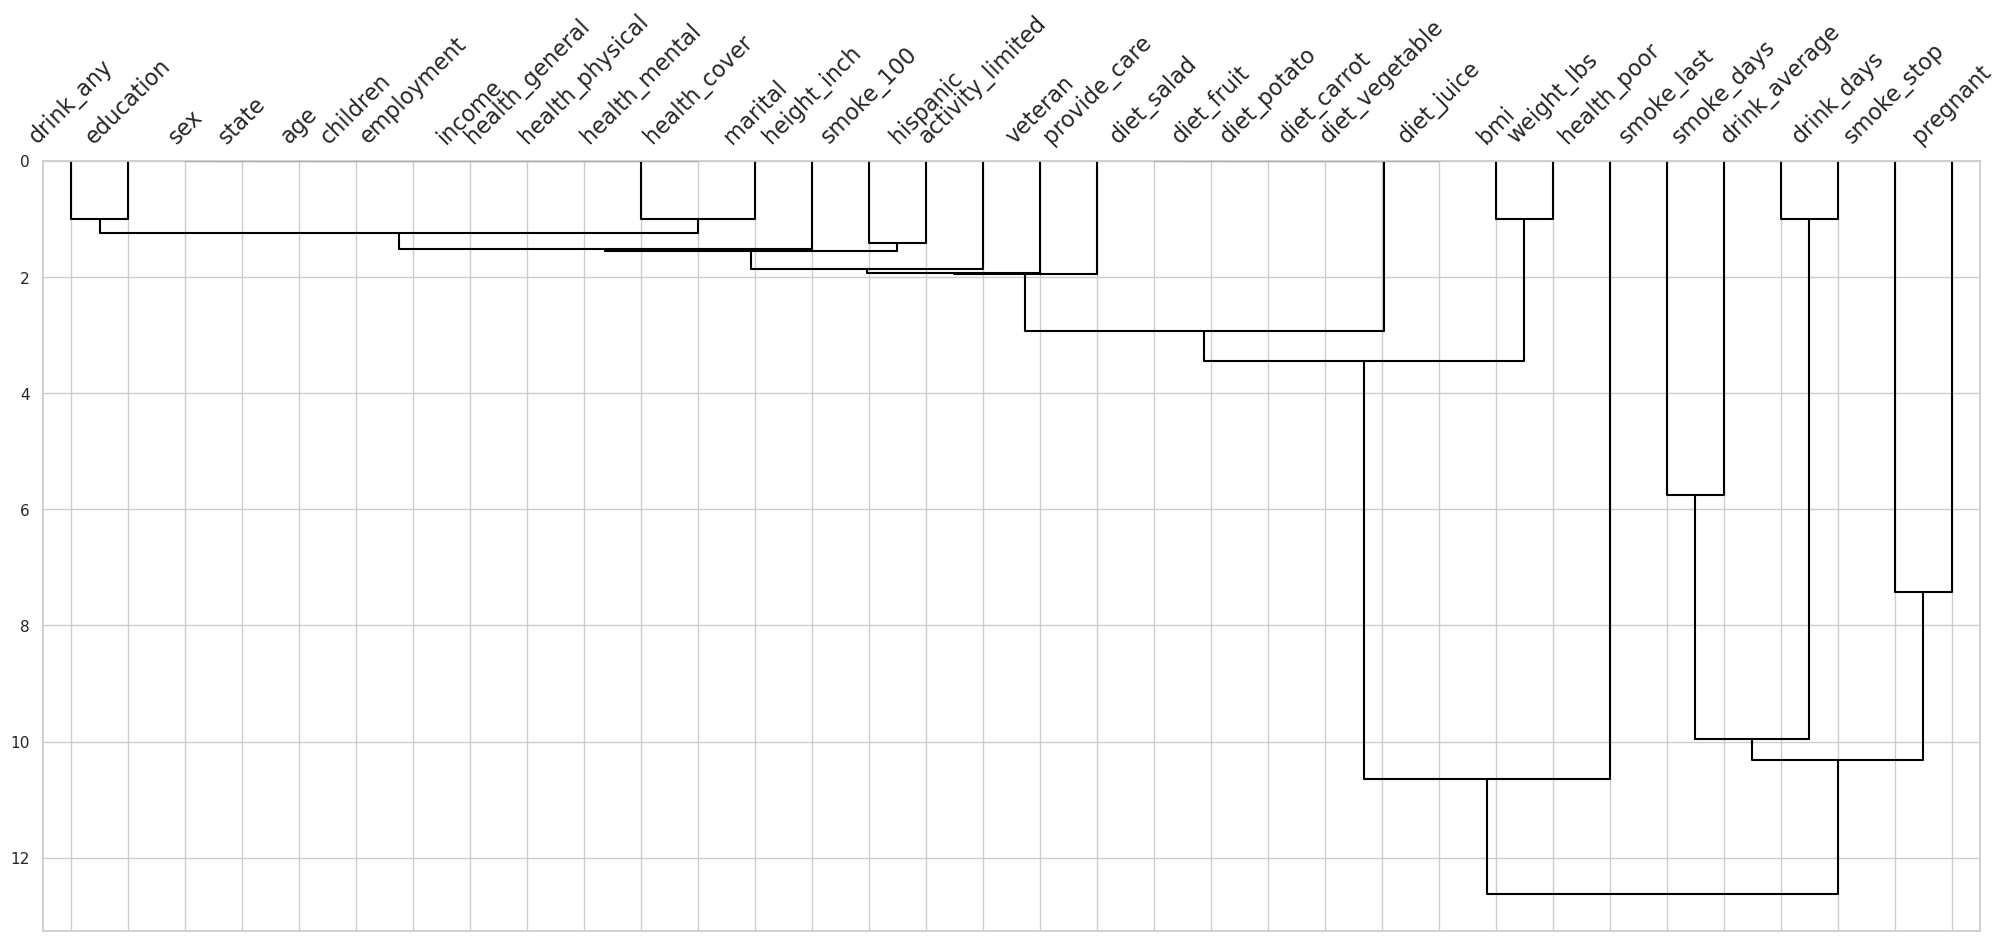

In [ ]:
missingno.dendrogram(
    df=riskfactors_df,
)#Agrupa los grupos o las columnas que tienen correlaciones muy altas. Si un numero de columnas estas agrupoadas cerca del nivel base significa que la precencia de valores faltantes  estan muy relacionadas con estas columnas con la ausencia de las otras , entre mas seprados esten , es menos probables que esten correlacionados. 

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [ ]:
riskfactors_df.shape # ver cuantasos valores tienes. filas y columnas.

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

In [ ]:
( #solo se van a eliminar valores faltantes durante las suma o resta de valores. conteo en general.
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [ ]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count() # tamaño, y conteo de valores no faltantes panda ignora los valores falantes. 

(245, 235)

In [ ]:
riskfactors_df.weight_lbs.mean(skipna=False) # con pandas hace el caluclu si evitar valores faltantes.

nan

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [ ]:
( # si existe un valor faltante toda la  columna sera eliminada. 
    riskfactors_df
    .dropna(
        subset=["weight_lbs"], # toma una lista para hacer eliminada si hay un valor faltante
        how="any" # tipde algoritmo poara eliminar valores faltantes
    )
    .shape
)

(235, 34)

#### Con base en 2 o más columnas

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs","height_inch"], # considerando dos o mas variables
        how="any"
    )
    .shape
)

(234, 34)

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs","height_inch"],
        how="all" # en el caso yo solo quiera eliminar aquellas observaciones en los cuales yo no tenga nionguna de estas observaciones
    )
    .shape
)

(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

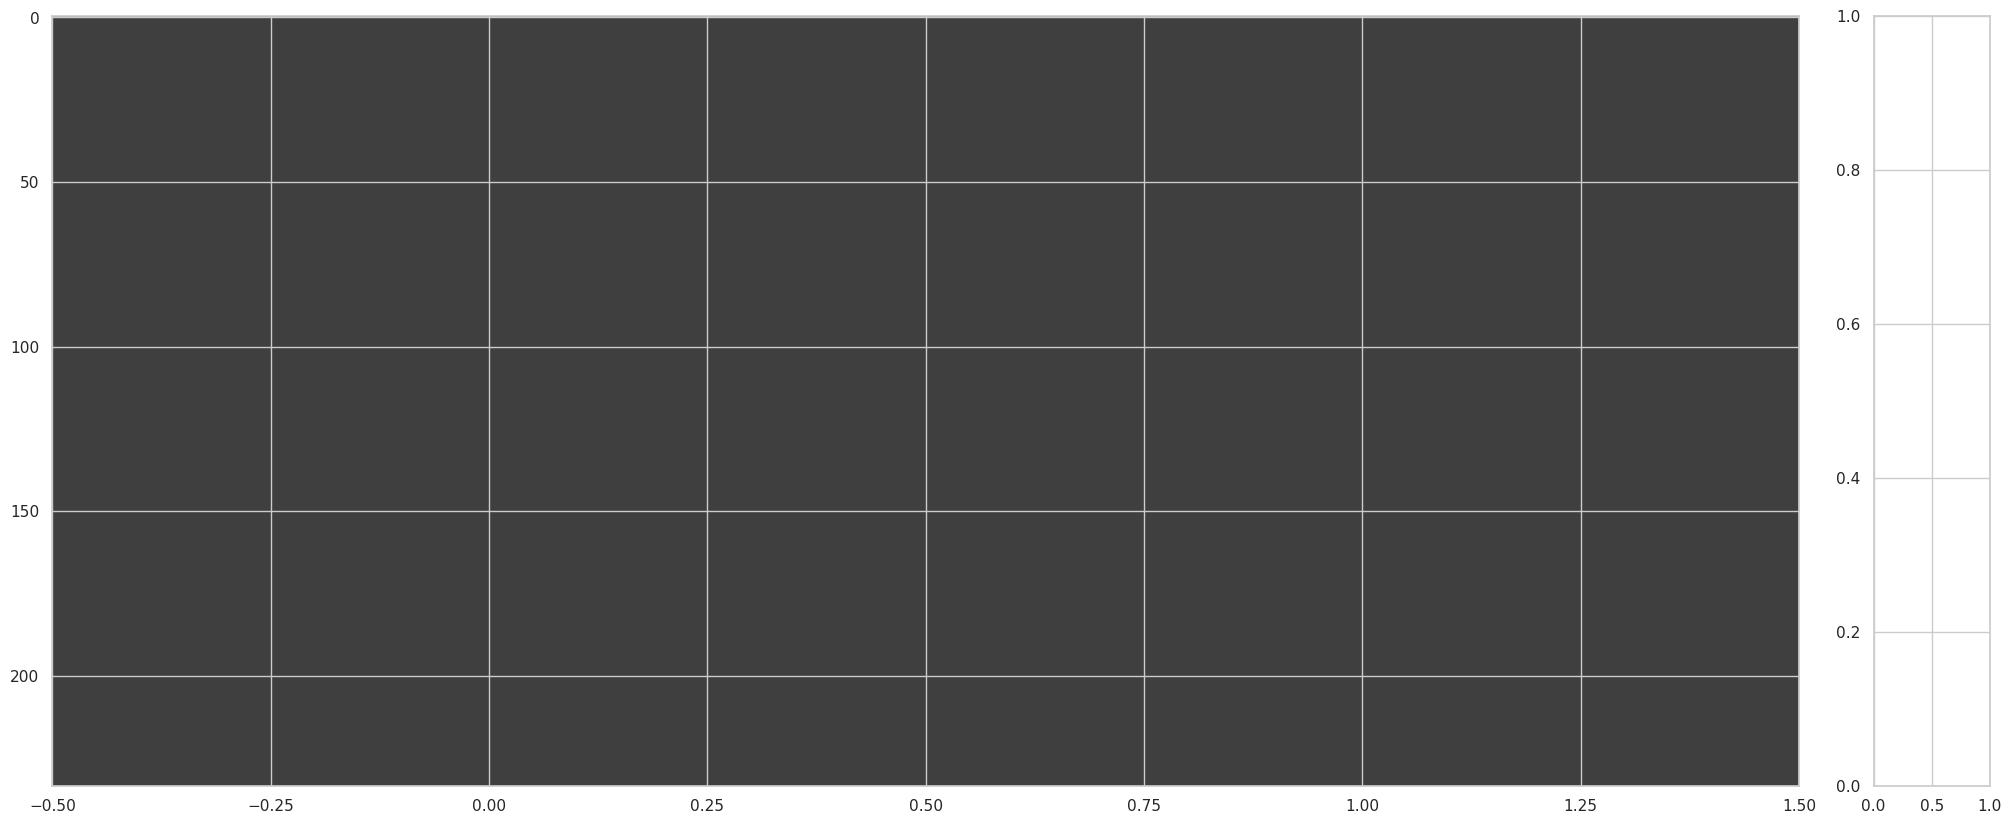

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs","height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs","height_inch"]) # janitor seleciona opara graficar.
    .pipe(
        lambda df: missingno.matrix(df)
    )
)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

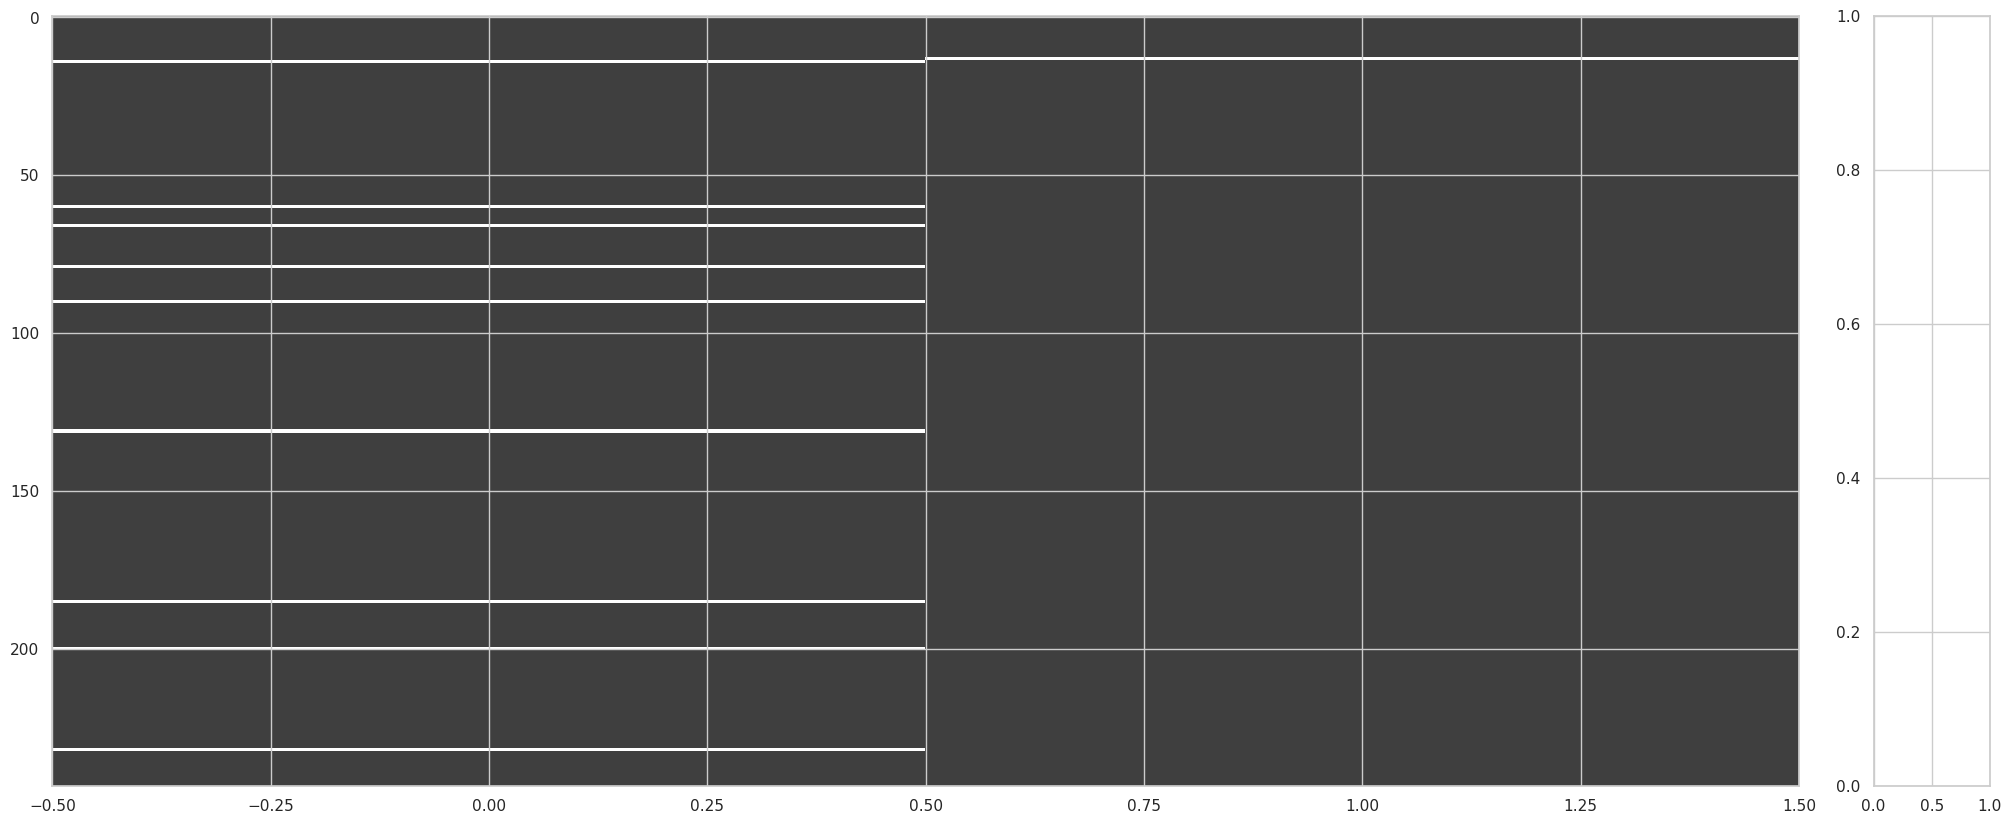

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs","height_inch"],
        how="all" #vemos la cantidad de variables faltantes en lineas
    )
    .select_columns(["weight_lbs","height_inch"])
    .pipe(
        lambda df: missingno.matrix(df)
    )
)

## Imputación básica de valores faltantes

### Imputación con base en el contexto

nosotros sabemos algo en el contexto de los datos por lo cual podemos completar los valores faltantes. 

In [ ]:
implicit_to_explicit_df=pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [ ]:
implicit_to_explicit_df.ffill() # completar el valor flatnte con el de arriba.

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

/tmp/ipykernel_2102/2146734893.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func=lambda column:column.fillna(column.mean()) if "_NA" not in column.name else column


<Figure size 1000x1000 with 0 Axes>

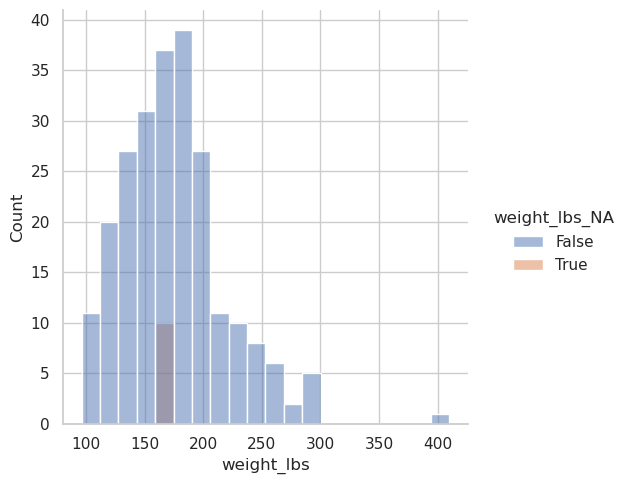

In [ ]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs","height_inch","bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False) #matrix de sombras usa v y f
    .apply(
        axis="rows", # ejecutar por columna
        func=lambda column:column.fillna(column.mean()) if "_NA" not in column.name else column # funcion en que la columna haga un fillna para rellenar valores faltantes en este caso con el promedio en el caso si "na no esta en columna de lo contrario no hagas nada."
    )
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA",
            )
        )
    )
)

/tmp/ipykernel_2102/529773108.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func=lambda column:column.fillna(column.mean()) if "_NA" not in column.name else column


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

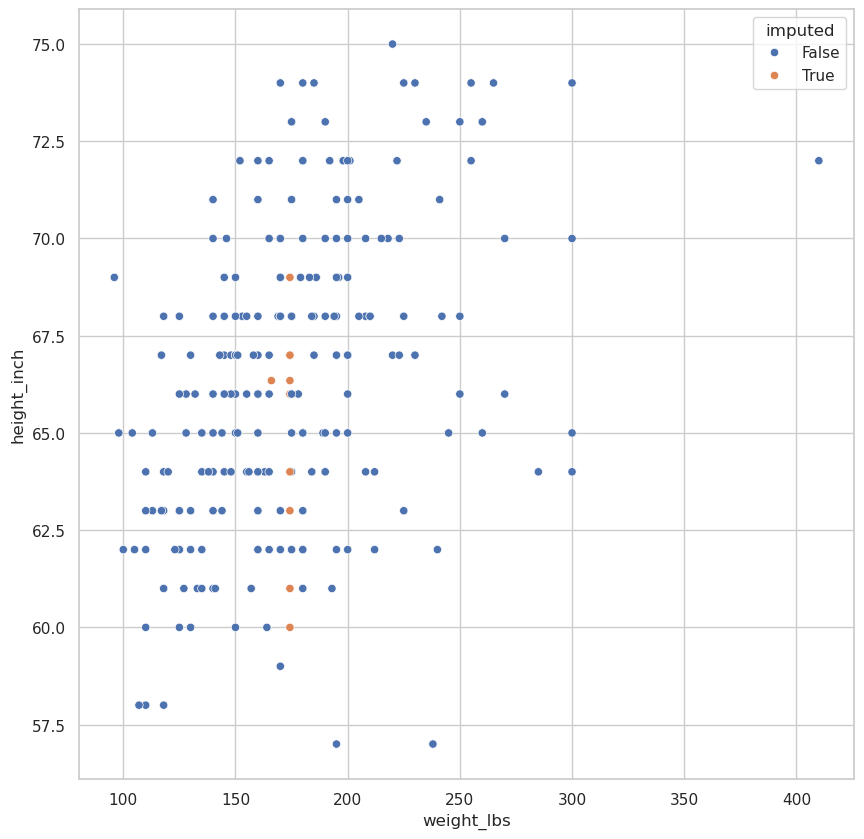

In [ ]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs","height_inch","bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column:column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df:df.weight_lbs_NA | df.height_inch_NA # creamos una nueva columna para ver si he imputado o no para las dos variables que queremos vizualizar en un scatterpolot
    )
    .pipe(
        lambda df:(
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)

/tmp/ipykernel_2102/1658015987.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func=lambda column: column.fillna(column.mean())


<Figure size 1000x1000 with 0 Axes>

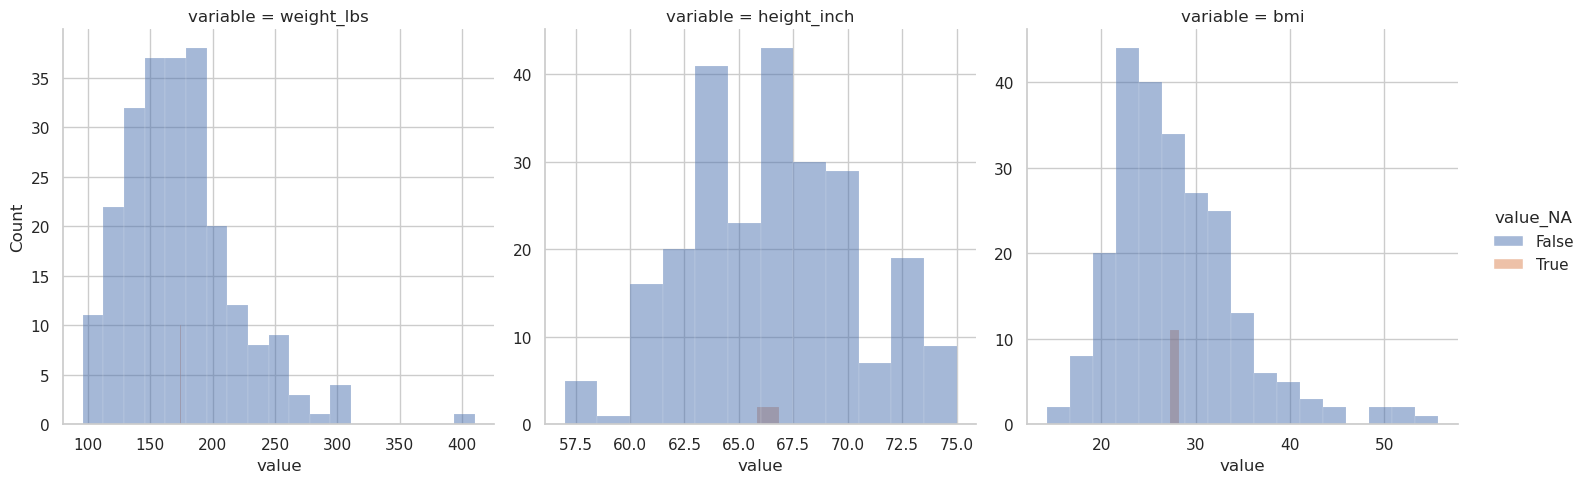

In [ ]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [ ]:
session_info.show()

NameError: name 'session_info' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>